# Seurat Analysis for Mouse Cell Atlas (kidney)

### 1. Loading libraries

In [2]:
library(knitr)
library(dplyr)
library(Seurat)
library(reticulate)
library(scales)
library(DT)
set.seed(1234)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘DT’


The following object is masked from ‘package:Seurat’:

    JS




### 2. Defining minimum arguments
(available library types are 10x, dropseq, mouse cell atlas)

In [3]:
arg01 <- "mca" #library name: tenx, dropseq, mca
arg02 <- "../../data/GSM2906426_Kidney2_dge.txt.gz" #count matrix (can be downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2906426)
arg03 <- "MCA_kidney" #project name
arg04 <- "MCA"  #output file name for saveRDS function

### 3. Creating Seurat Object

In [4]:
switch(arg01,
    "tenx" = tmp.data <- Read10X(data.dir = arg02),
    "dropseq" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    "mca" = tmp.data <- read.table(arg02, sep = "\t", header=T, row.names=1),
    print("You have chosen undefined library parameter"))
tmp <- CreateSeuratObject(counts = tmp.data, project = arg03, min.cells = 3)
print(tmp)

An object of class Seurat 
15554 features across 6220 samples within 1 assay 
Active assay: RNA (15554 features)


### 4. Srtandard pre-processing workflow

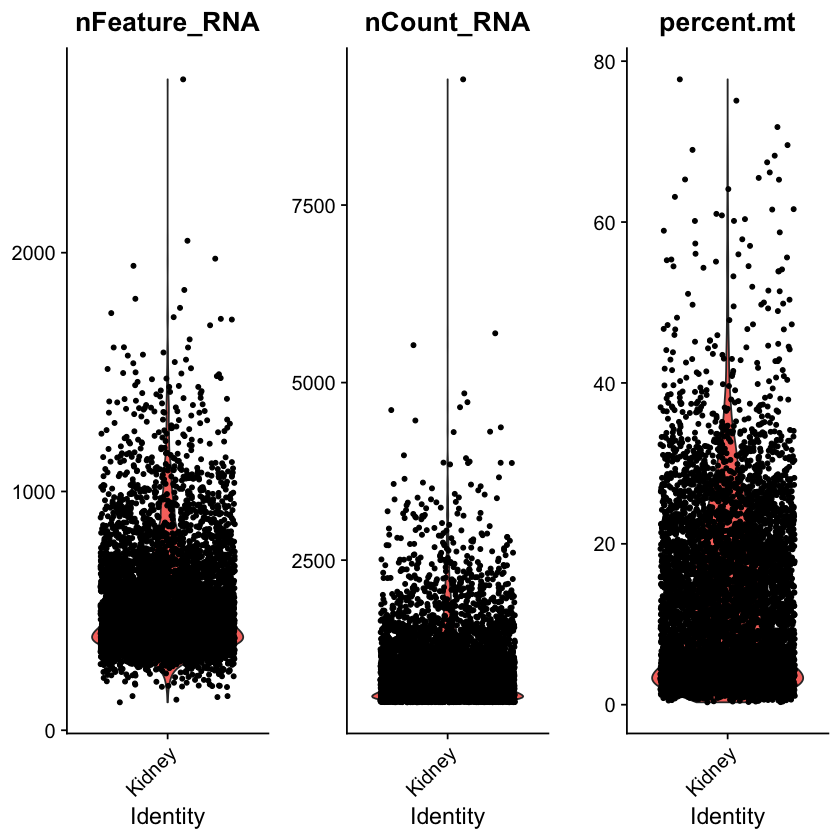

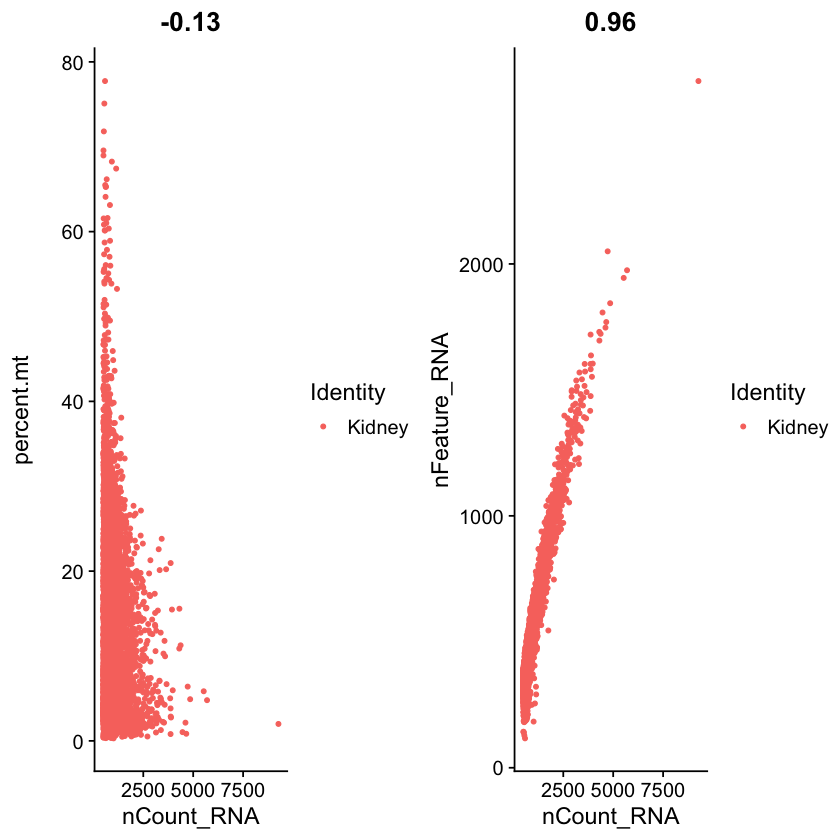

In [5]:
tmp[["percent.mt"]] <- PercentageFeatureSet(tmp, pattern="^MT-")
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
#png("01-VlnPlot.png")
#VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
#dev.off()
plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))
#png("02-ScatterPlot.png", width=686,  height=480)
#CombinePlots(plots = list(plot1, plot2))
#dev.off()

### 5. Determining cutoffs from upper figures

In [6]:
arg05 <- 10 #nFeature_RNA_min
arg06 <- 2000 #nFeature_RNA_max
arg07 <- 0 #nCount_RNA_min
arg08 <- 4000 #nCount_RNA_max
arg09 <- 40 #percent.mt_max

### 6. Stats after quality control

An object of class Seurat 
15554 features across 6107 samples within 1 assay 
Active assay: RNA (15554 features)


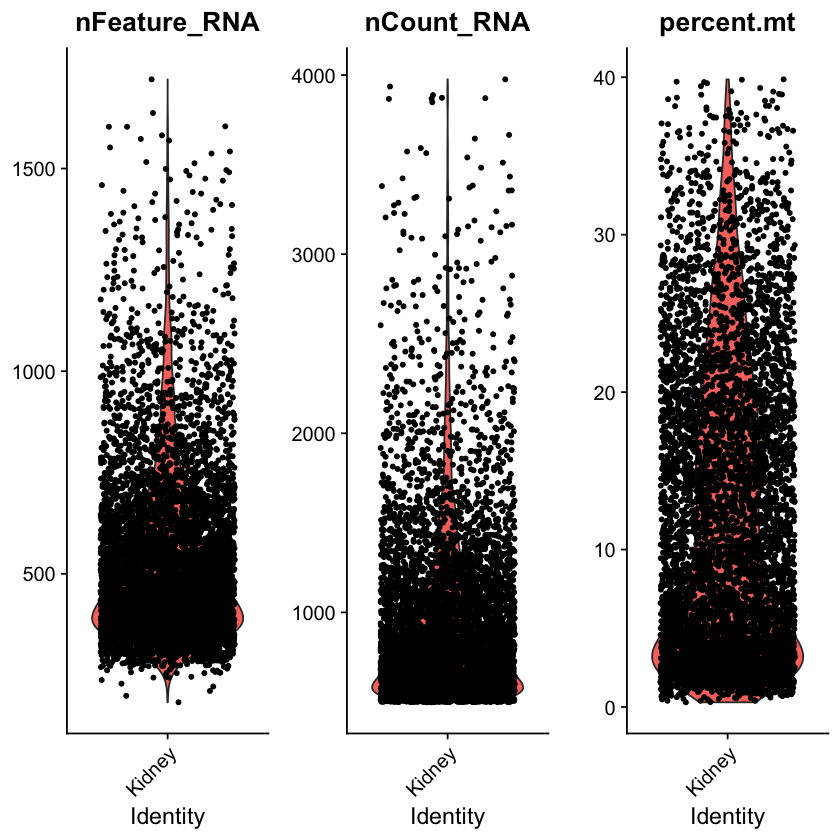

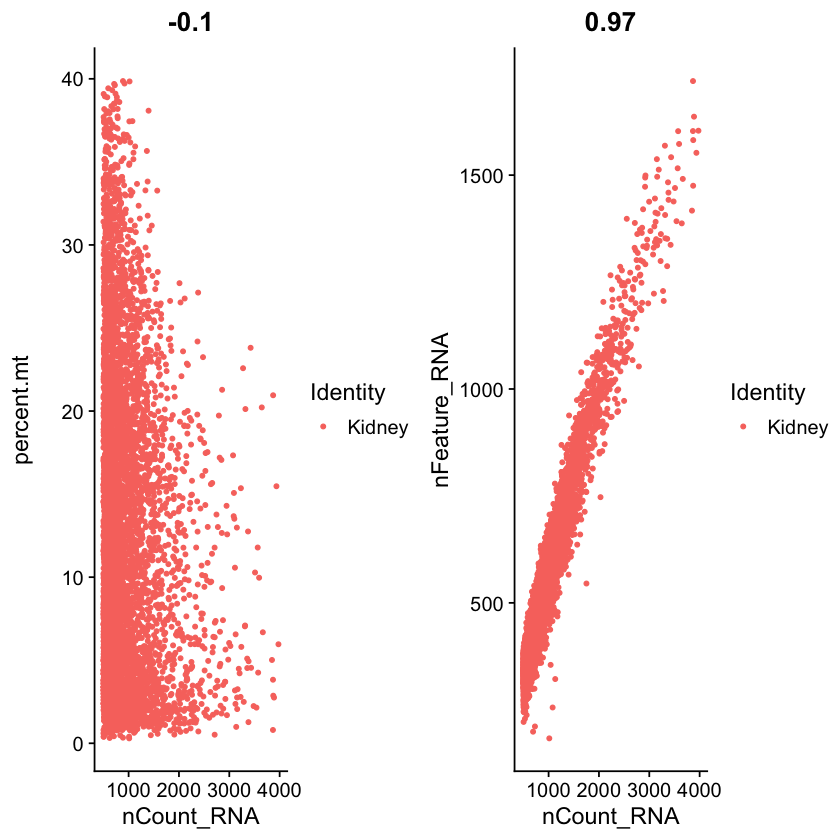

In [7]:
tmp <- subset(tmp, subset = nFeature_RNA > arg05 & nFeature_RNA < arg06 & nCount_RNA > arg07 & nCount_RNA < arg08 & percent.mt < arg09)
print(tmp)
VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
#png("01-VlnPlot_after.png")
#VlnPlot(tmp, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
#dev.off()
plot1 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(tmp, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))
#png("02-ScatterPlot_after.png", width=686,  height=480)
#CombinePlots(plots = list(plot1, plot2))
#dev.off()

### 7. Normalizing and selecting features
・Normalize function may be changed in the near future (to SCtransform)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”
When using repel, set xnudge and ynudge to 0 for optimal results



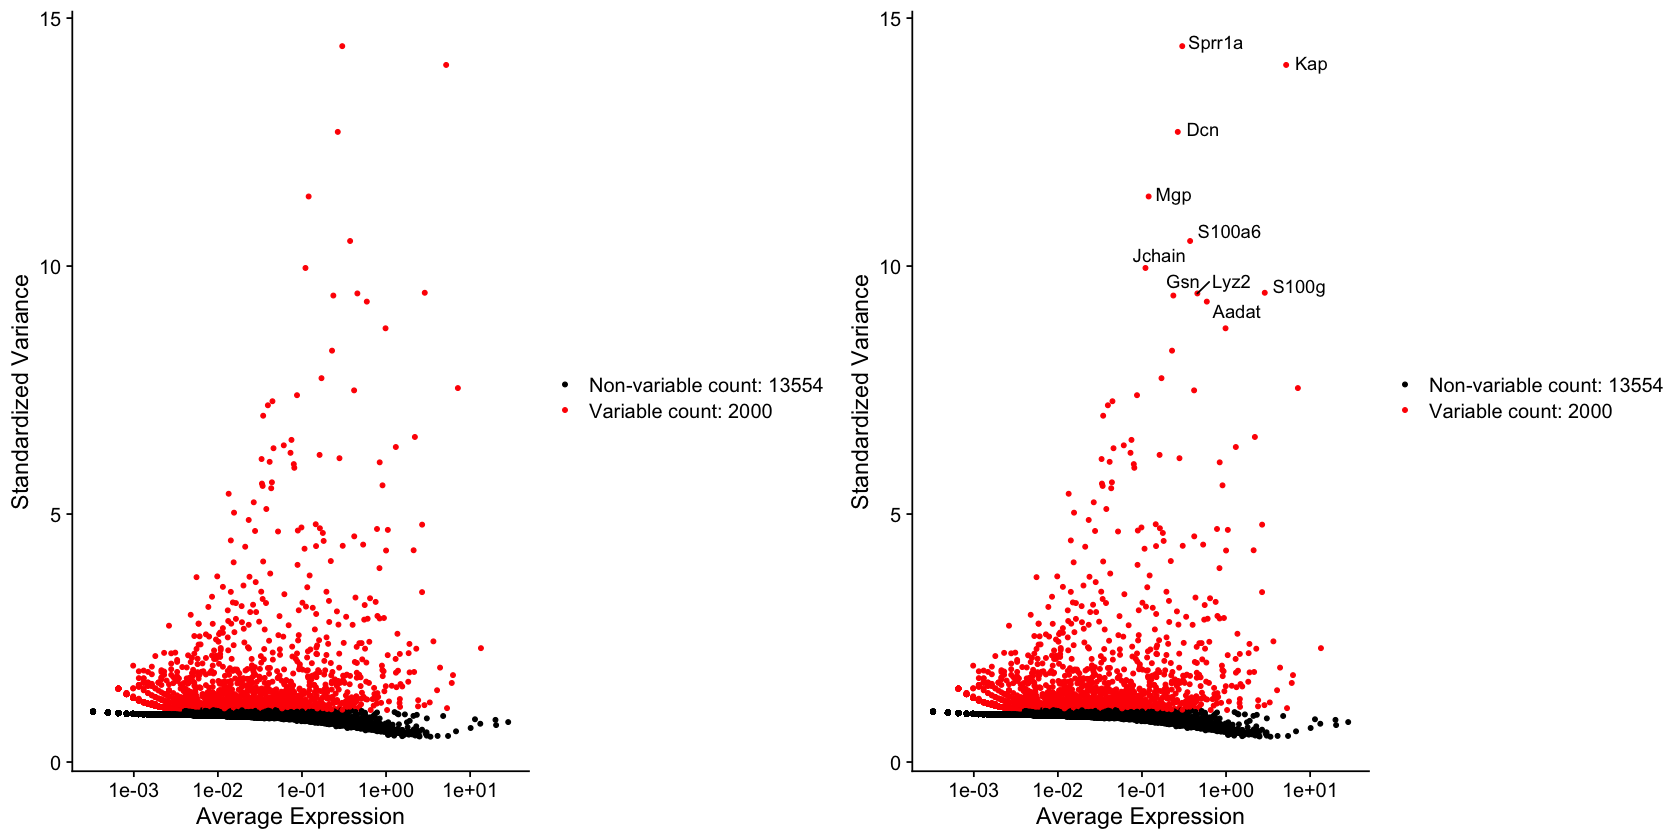

In [8]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000)
tmp <- FindVariableFeatures(tmp, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(tmp), 10)
plot1 <- VariableFeaturePlot(tmp)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=14)
CombinePlots(plots = list(plot1, plot2))
#png("03-VariableFeaturePlot.png", width=800, height=480)
#CombinePlots(plots = list(plot1, plot2))
#dev.off()

### 8. Scaling and performing linear dimensional reduction

Centering and scaling data matrix

PC_ 1 
Positive:  Tmsb4x, Ly6e, Ier3, Lgals3, H2-K1, Cst3, Gadd45b, Mt1, Zfp36, Cd24a 
	   Nfkbia, Atf3, Ifrd1, Defb1, H2-D1, B2m, Ifitm3, Tmem213, Junb, Sh3bgrl3 
	   Tmsb10, Cd9, Fos, Clu, Hspb1, Anxa2, Hspa1a, Hspa5, S100a6, Litaf 
Negative:  Aldob, Gsta2, Keg1, Rida, Spink1, Ass1, Miox, Fbp1, Dbi, Akr1c21 
	   Hao2, Pck1, Gpx1, Sord, Pdzk1, Ttc36, Akr1a1, AI314278, Fmo1, Calml4 
	   Pter, Acaa1b, Glyat, Cda, Gpx3, Tmem27, Scp2, Msra, Bphl, Slc34a1 
PC_ 2 
Positive:  Tmem213, Atp1a1, MT-Nd5, Kng2, Defb1, Wfdc15b, Ppp1r1a, Tmem52b, Egf, Umod 
	   Clcnkb, Klk1, Kcnj1, Spp1, Pgam2, Sostdc1, Atp6v1b1, MT-Rnr2, MT-Rnr1, Wfdc2 
	   Slc12a3, Cldn8, Slc16a7, Tspan1, Calb1, Slc12a1, Clu, Rhcg, Mt1, Fabp3 
Negative:  B2m, Ifitm3, Tmsb4x, Vim, Sparc, Cd74, H2-Eb1, Srgn, Tmsb10, Hspa8 
	   H2-Aa, H2-Ab1, Dusp1, Dcn, S100a6, Ctss, Ogn, Col1a2, Serping1, Cd52 
	   Nfkbia, H2-K1, Actb, H2-D1, Cxcl1, Il1b, Tyrobp, Hmox1, H3f3b, Crip1 
PC_ 3 
Positive:  Ctss, H2-Aa

PC_ 1 
Positive:  Tmsb4x, Ly6e, Ier3, Lgals3, H2-K1 
Negative:  Aldob, Gsta2, Keg1, Rida, Spink1 
PC_ 2 
Positive:  Tmem213, Atp1a1, MT-Nd5, Kng2, Defb1 
Negative:  B2m, Ifitm3, Tmsb4x, Vim, Sparc 
PC_ 3 
Positive:  Ctss, H2-Aa, H2-Eb1, Cd52, H2-Ab1 
Negative:  Dcn, Serping1, Ogn, Col1a2, Col3a1 
PC_ 4 
Positive:  Dcn, Ogn, Col1a2, Serping1, Col3a1 
Negative:  Cldn4, Krt8, Krt18, Hbegf, Actg1 
PC_ 5 
Positive:  Aadat, Serpina1f, Napsa, Kcnk1, Akr1c18 
Negative:  Gpx3, Slc34a1, Gatm, Miox, Glyat 


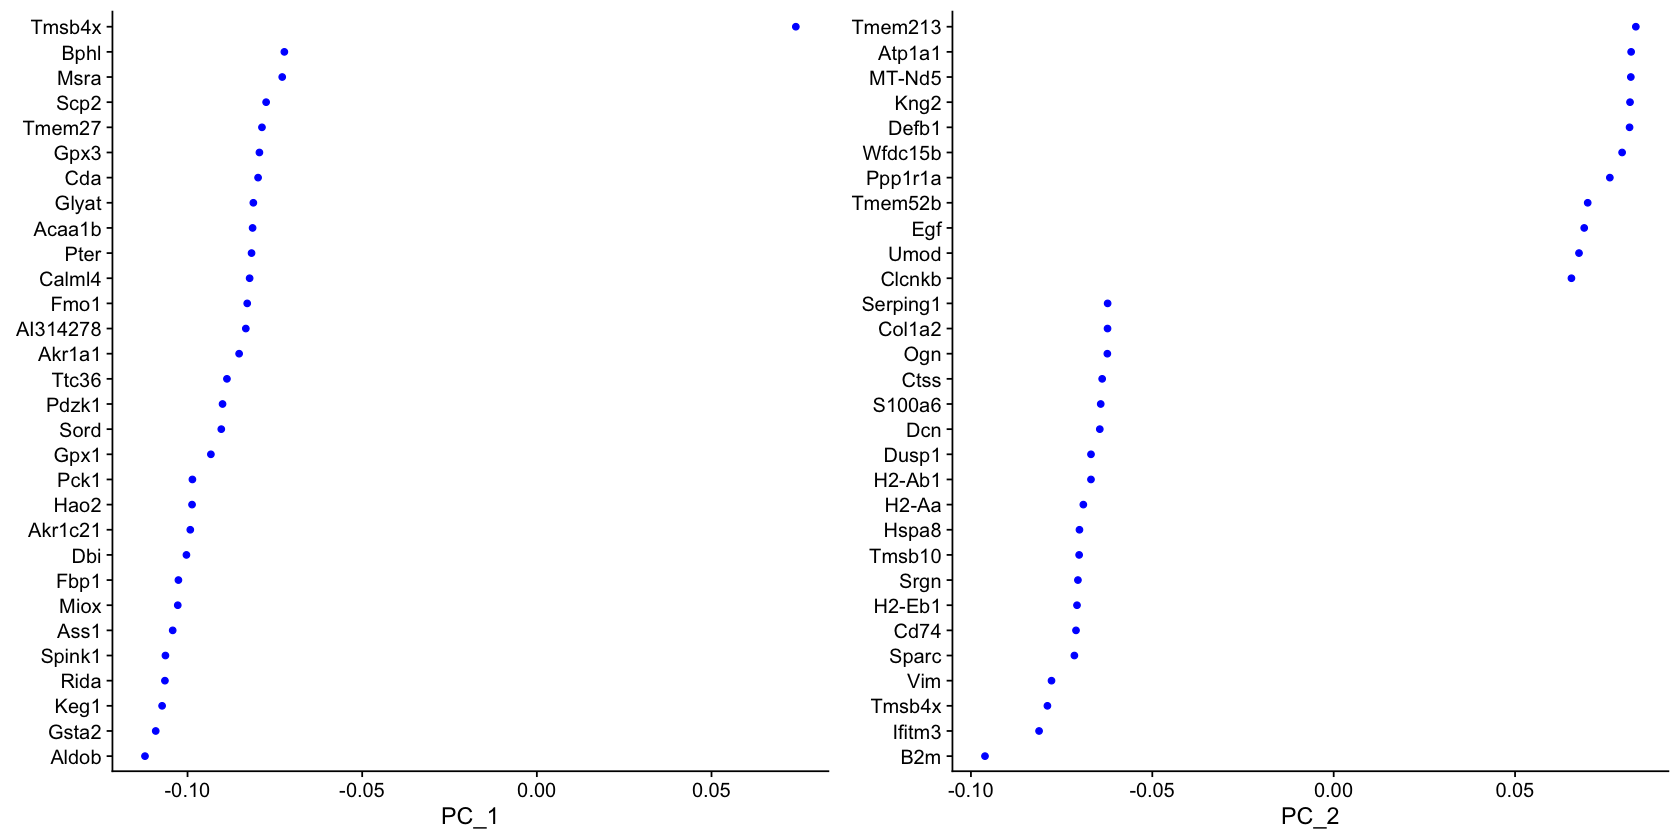

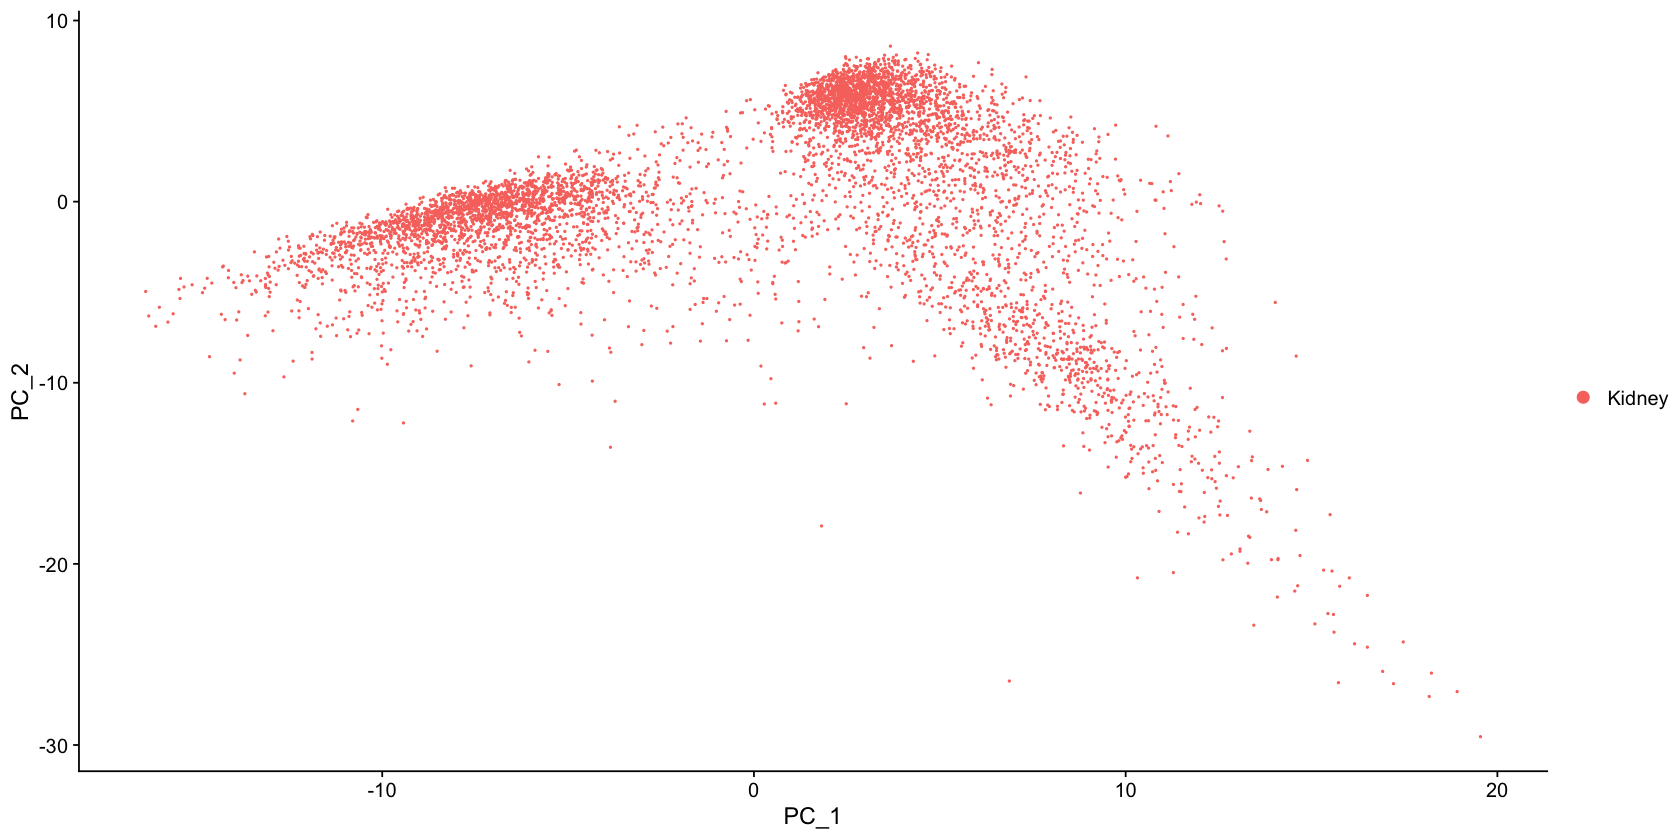

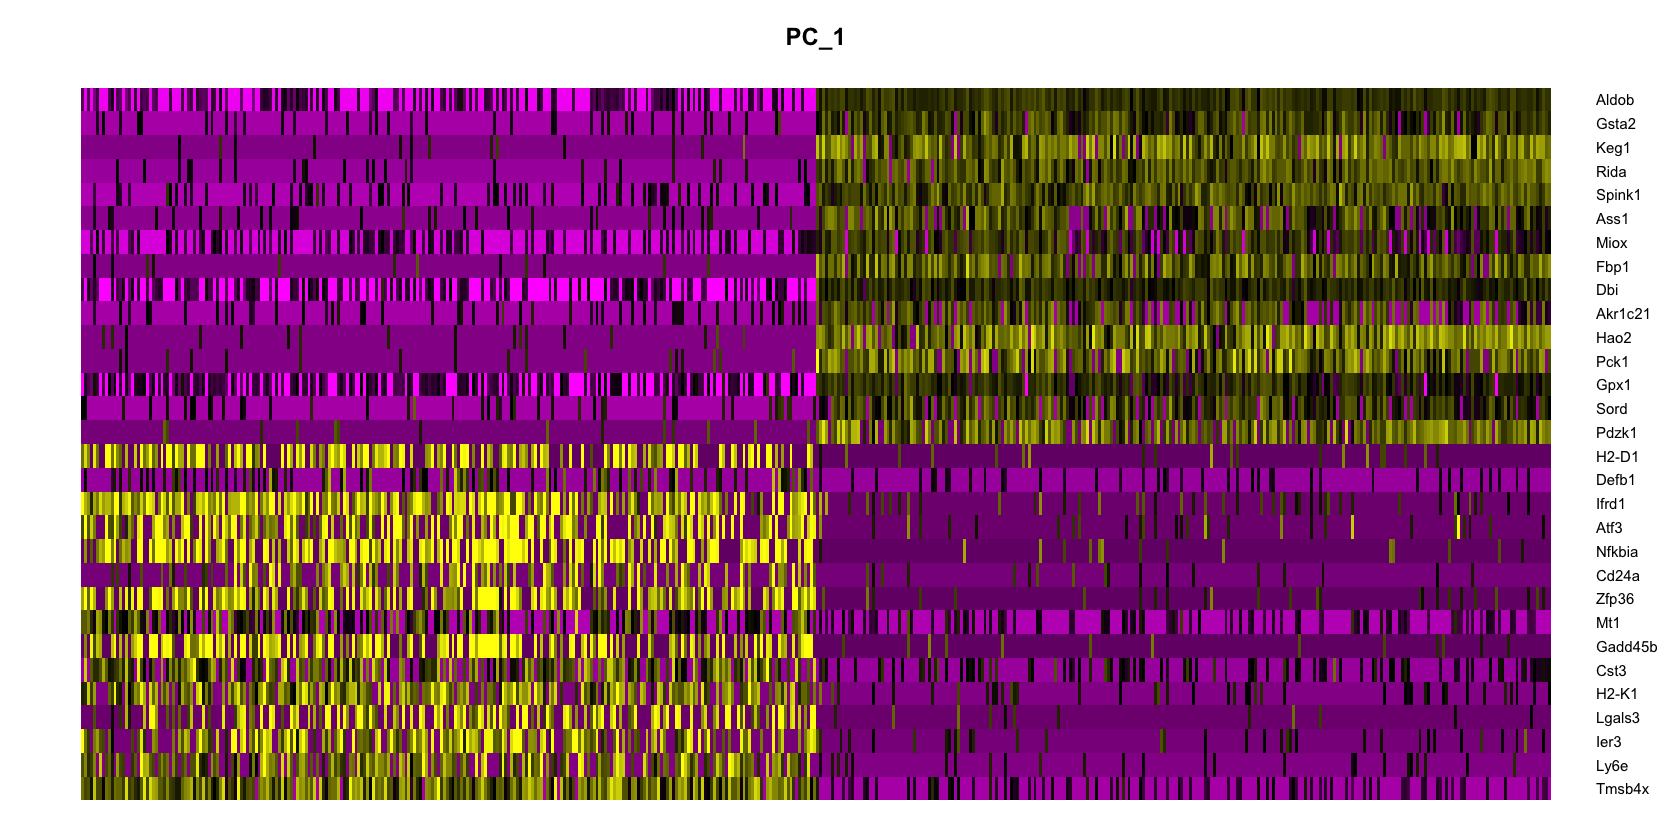

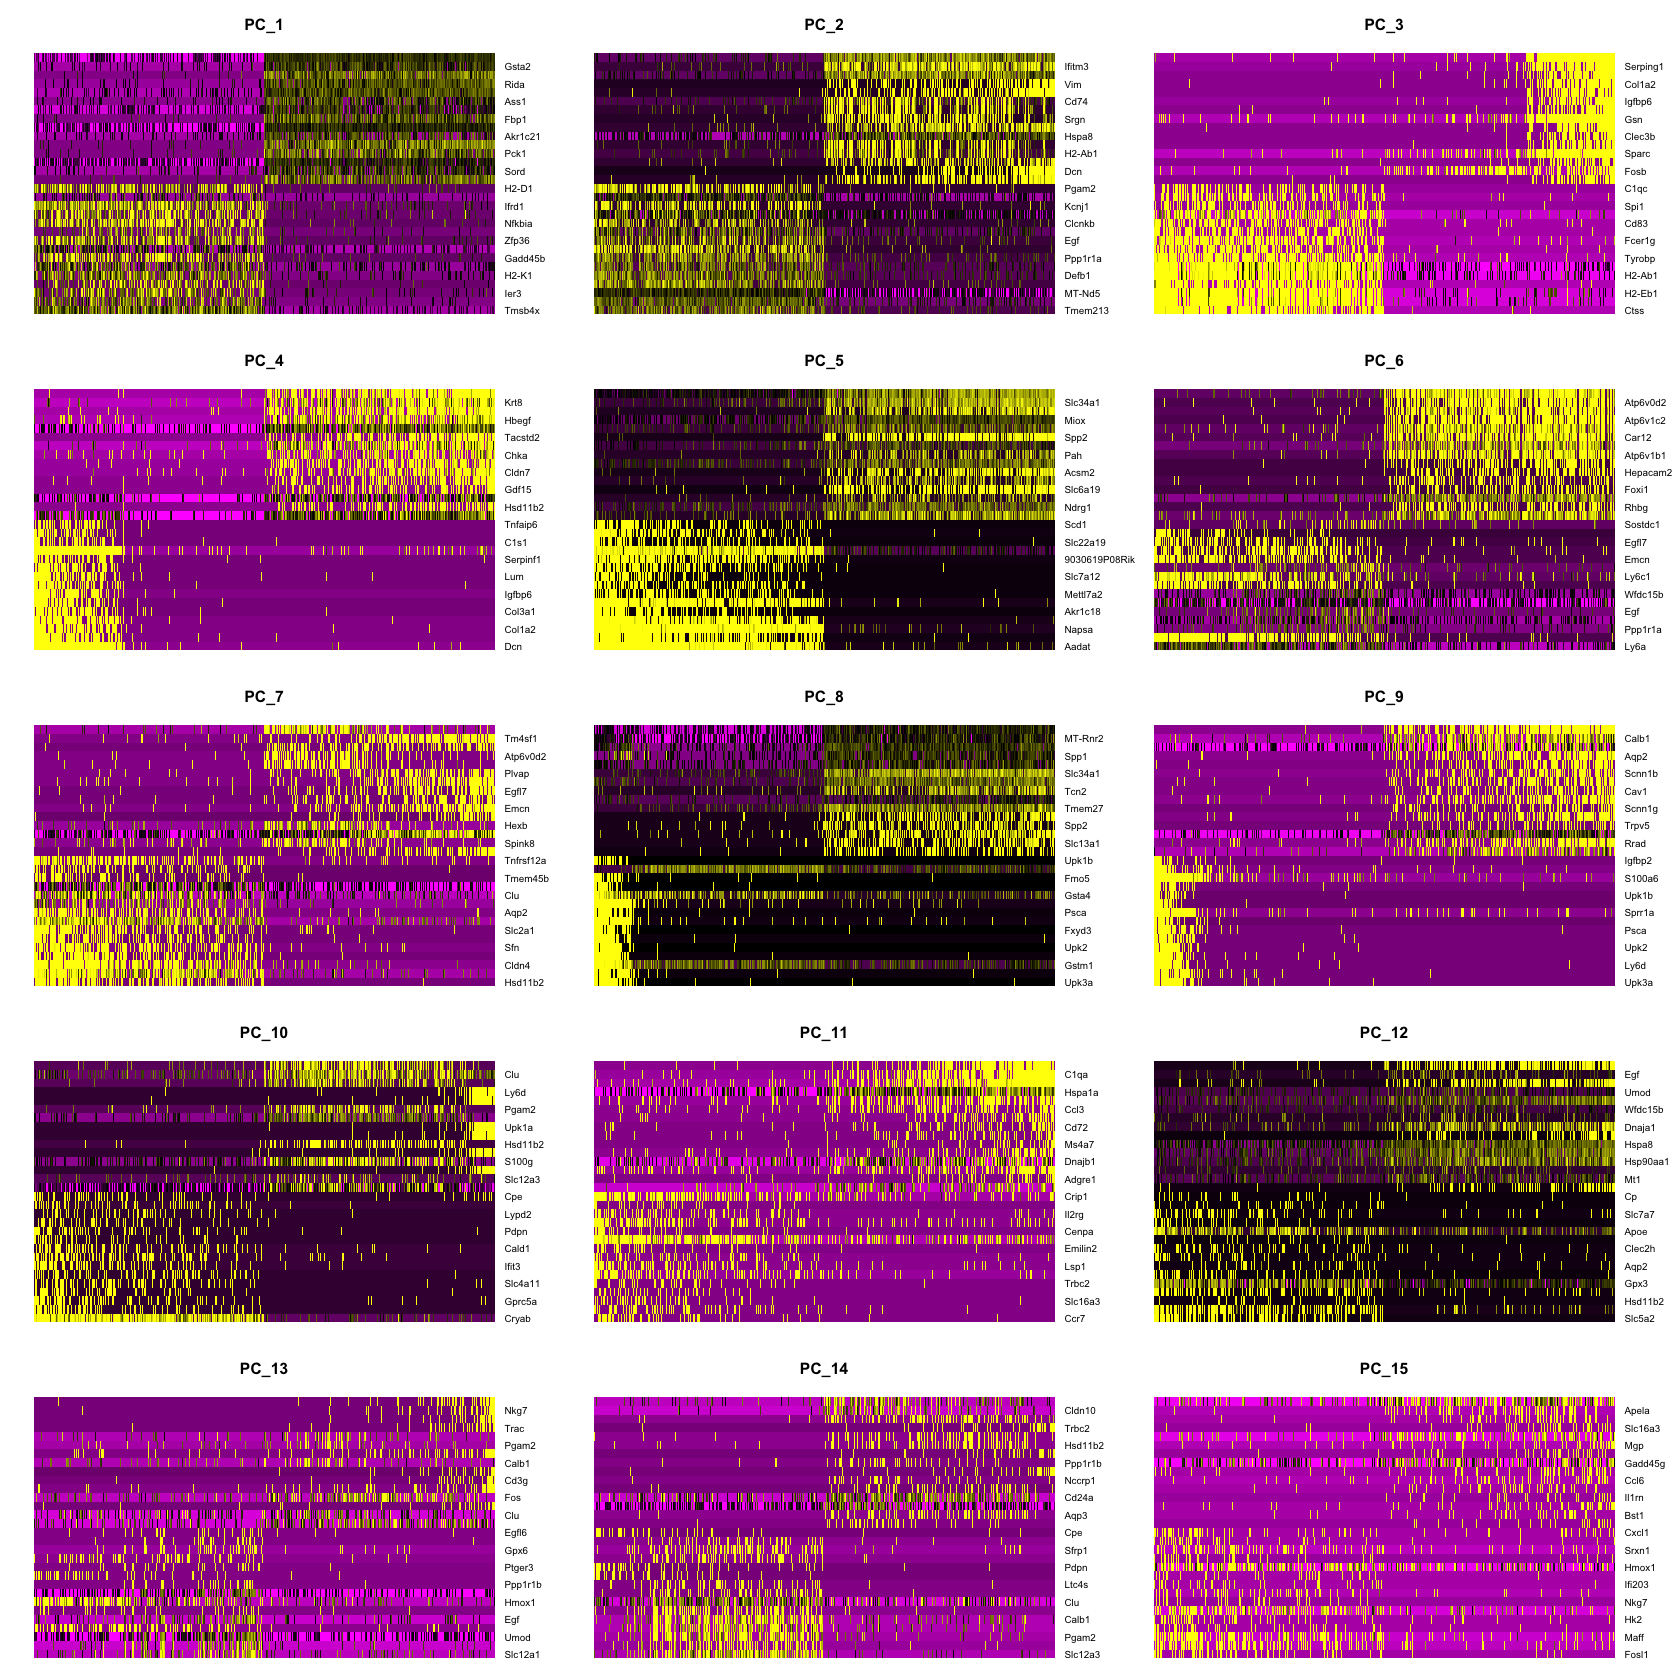

In [9]:
all.genes <- rownames(tmp)
tmp <- ScaleData(tmp, features=all.genes)

tmp <- RunPCA(tmp, features = VariableFeatures(object = tmp))
print(tmp[["pca"]], dims=1:5, nfeatures=5)

VizDimLoadings(tmp, dims=1:2, reduction="pca")
#png("04-VizDimLoadings.png")
#VizDimLoadings(tmp, dims=1:2, reduction="pca")
#dev.off()

DimPlot(tmp, reduction="pca")
#png("05-DimPlot.png")
#DimPlot(tmp, reduction="pca")
#dev.off()

DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)
#png("06-DimHeatmap.png")
#DimHeatmap(tmp, dims=1, cells=500, balanced=TRUE)
#dev.off()

options(repr.plot.width=14, repr.plot.height=14)
DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)
#png("07-DimHeatmap_mul.png", width=480, height=1000)
#DimHeatmap(tmp, dims=1:15, cells=500, balanced=TRUE)
#dev.off()

### 9. Determining the dimensionality of the dataset

Warning message:
“Removed 28011 rows containing missing values (geom_point).”


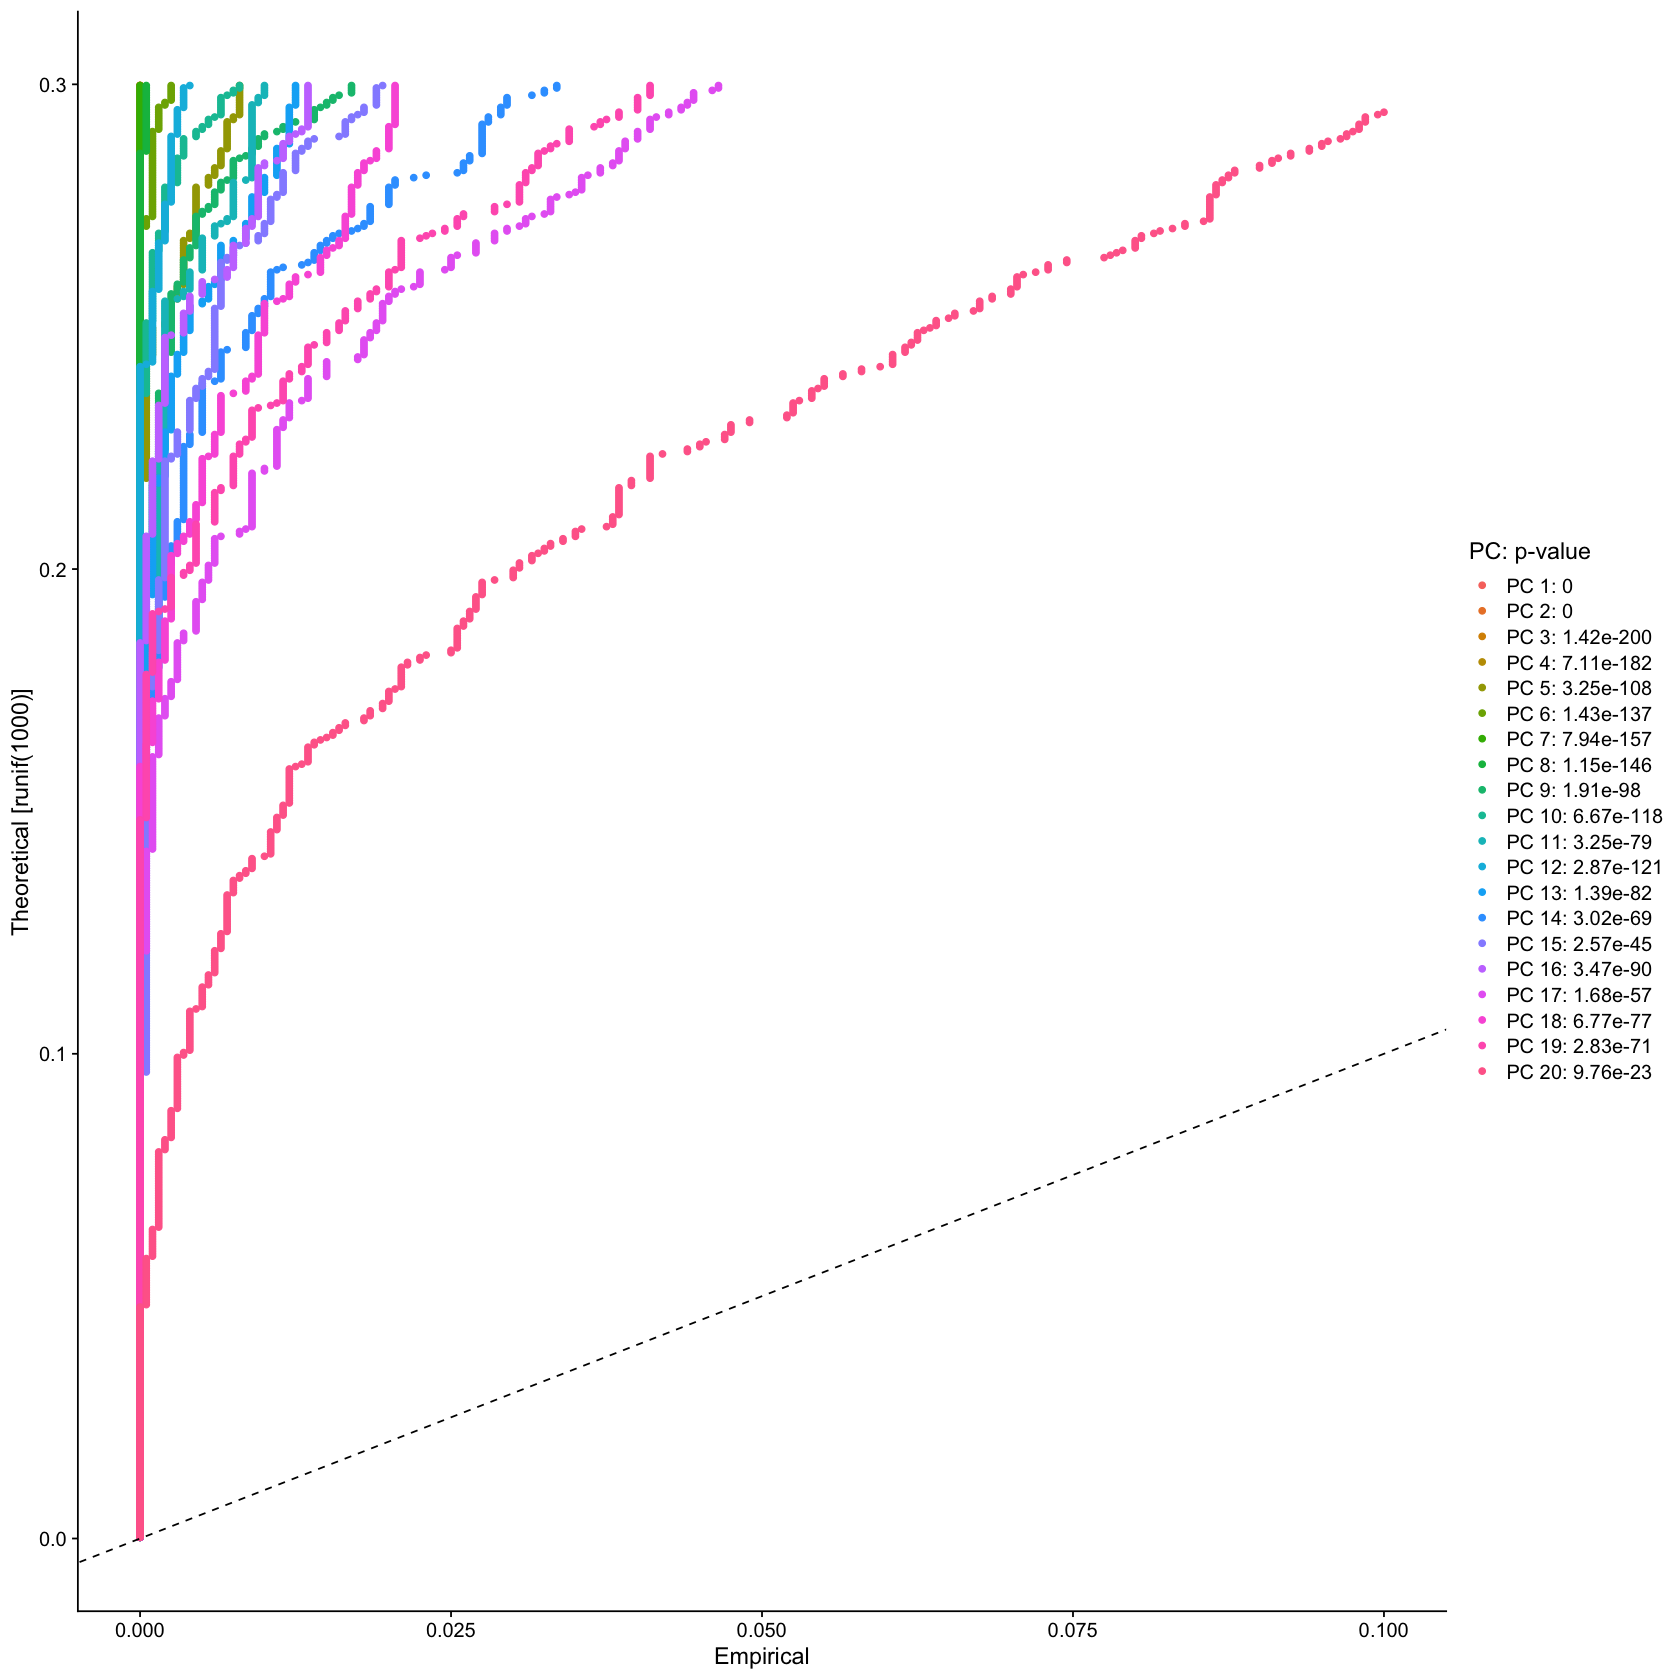

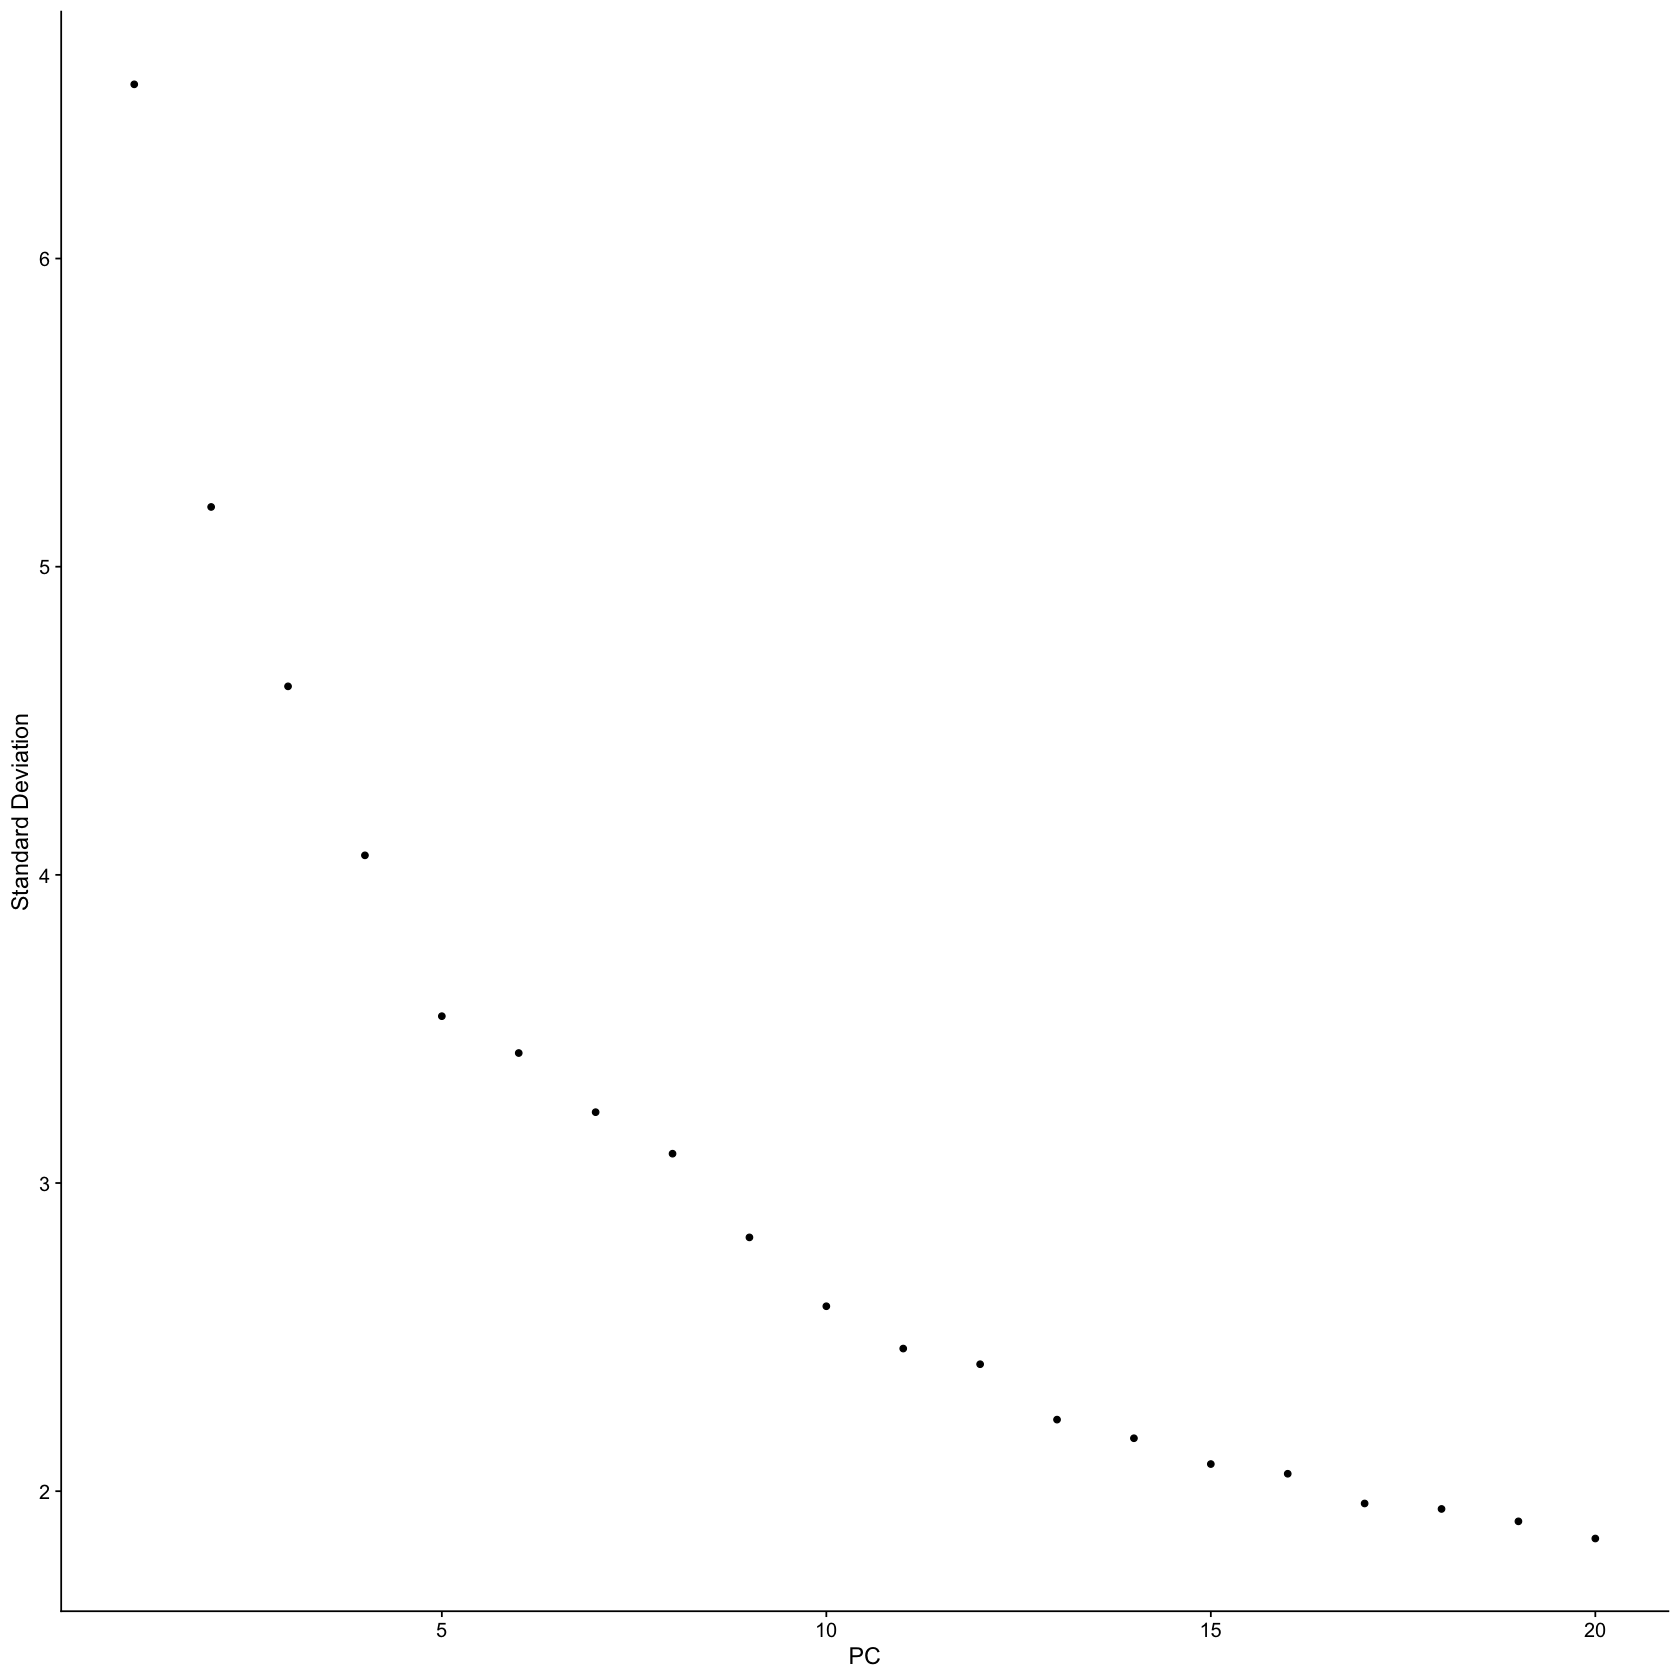

In [10]:
tmp <- JackStraw(tmp, num.replicate=100)
tmp <- ScoreJackStraw(tmp, dims=1:20)

JackStrawPlot(tmp, dims=1:20)
#png("08-JackStrawPlot.png")
#JackStrawPlot(tmp, dims=1:20)
#dev.off()

ElbowPlot(tmp)
#png("09-ElbowPlot.png")
#ElbowPlot(tmp)
#dev.off()

### 10. Determing PC cutoff from above figure

In [11]:
arg10 <- 20 #maximum PC

### 11. Clustering and UMAP

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6107
Number of edges: 227849

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8910
Number of communities: 18
Elapsed time: 0 seconds


Kidney_2.CATGATGGGTTTTGCGGA Kidney_2.CAAAGTCGTGGCATTTGC 
                         10                          10 
Kidney_2.CTCGCAGGCTGCAAGTAC Kidney_2.ACGTTGCTTCTGGCCTAG 
                          2                           2 
Kidney_2.CTCGCATATTGTGAGATC 
                          6 
Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
13:13:41 UMAP embedding parameters a = 0.9922 b = 1.112

13:13:41 Read 6107 rows and found 20 numeric columns

13:13:41 Using Annoy for neighbor search, n_neighbors = 30

13:13:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

13:13:43 Writing NN index file to temp file /var/folders/dz/p6h1hl554kz1w5mdkrn_h2tc0000gn/T//RtmpJVYPkS/file3588435bc793

13:13:44 Searching Annoy index using 1 thread, search_k = 3000

13:13:46 Annoy recall = 100%

13:13:46 Commencing smooth kNN distance calibra

pdf 
  2

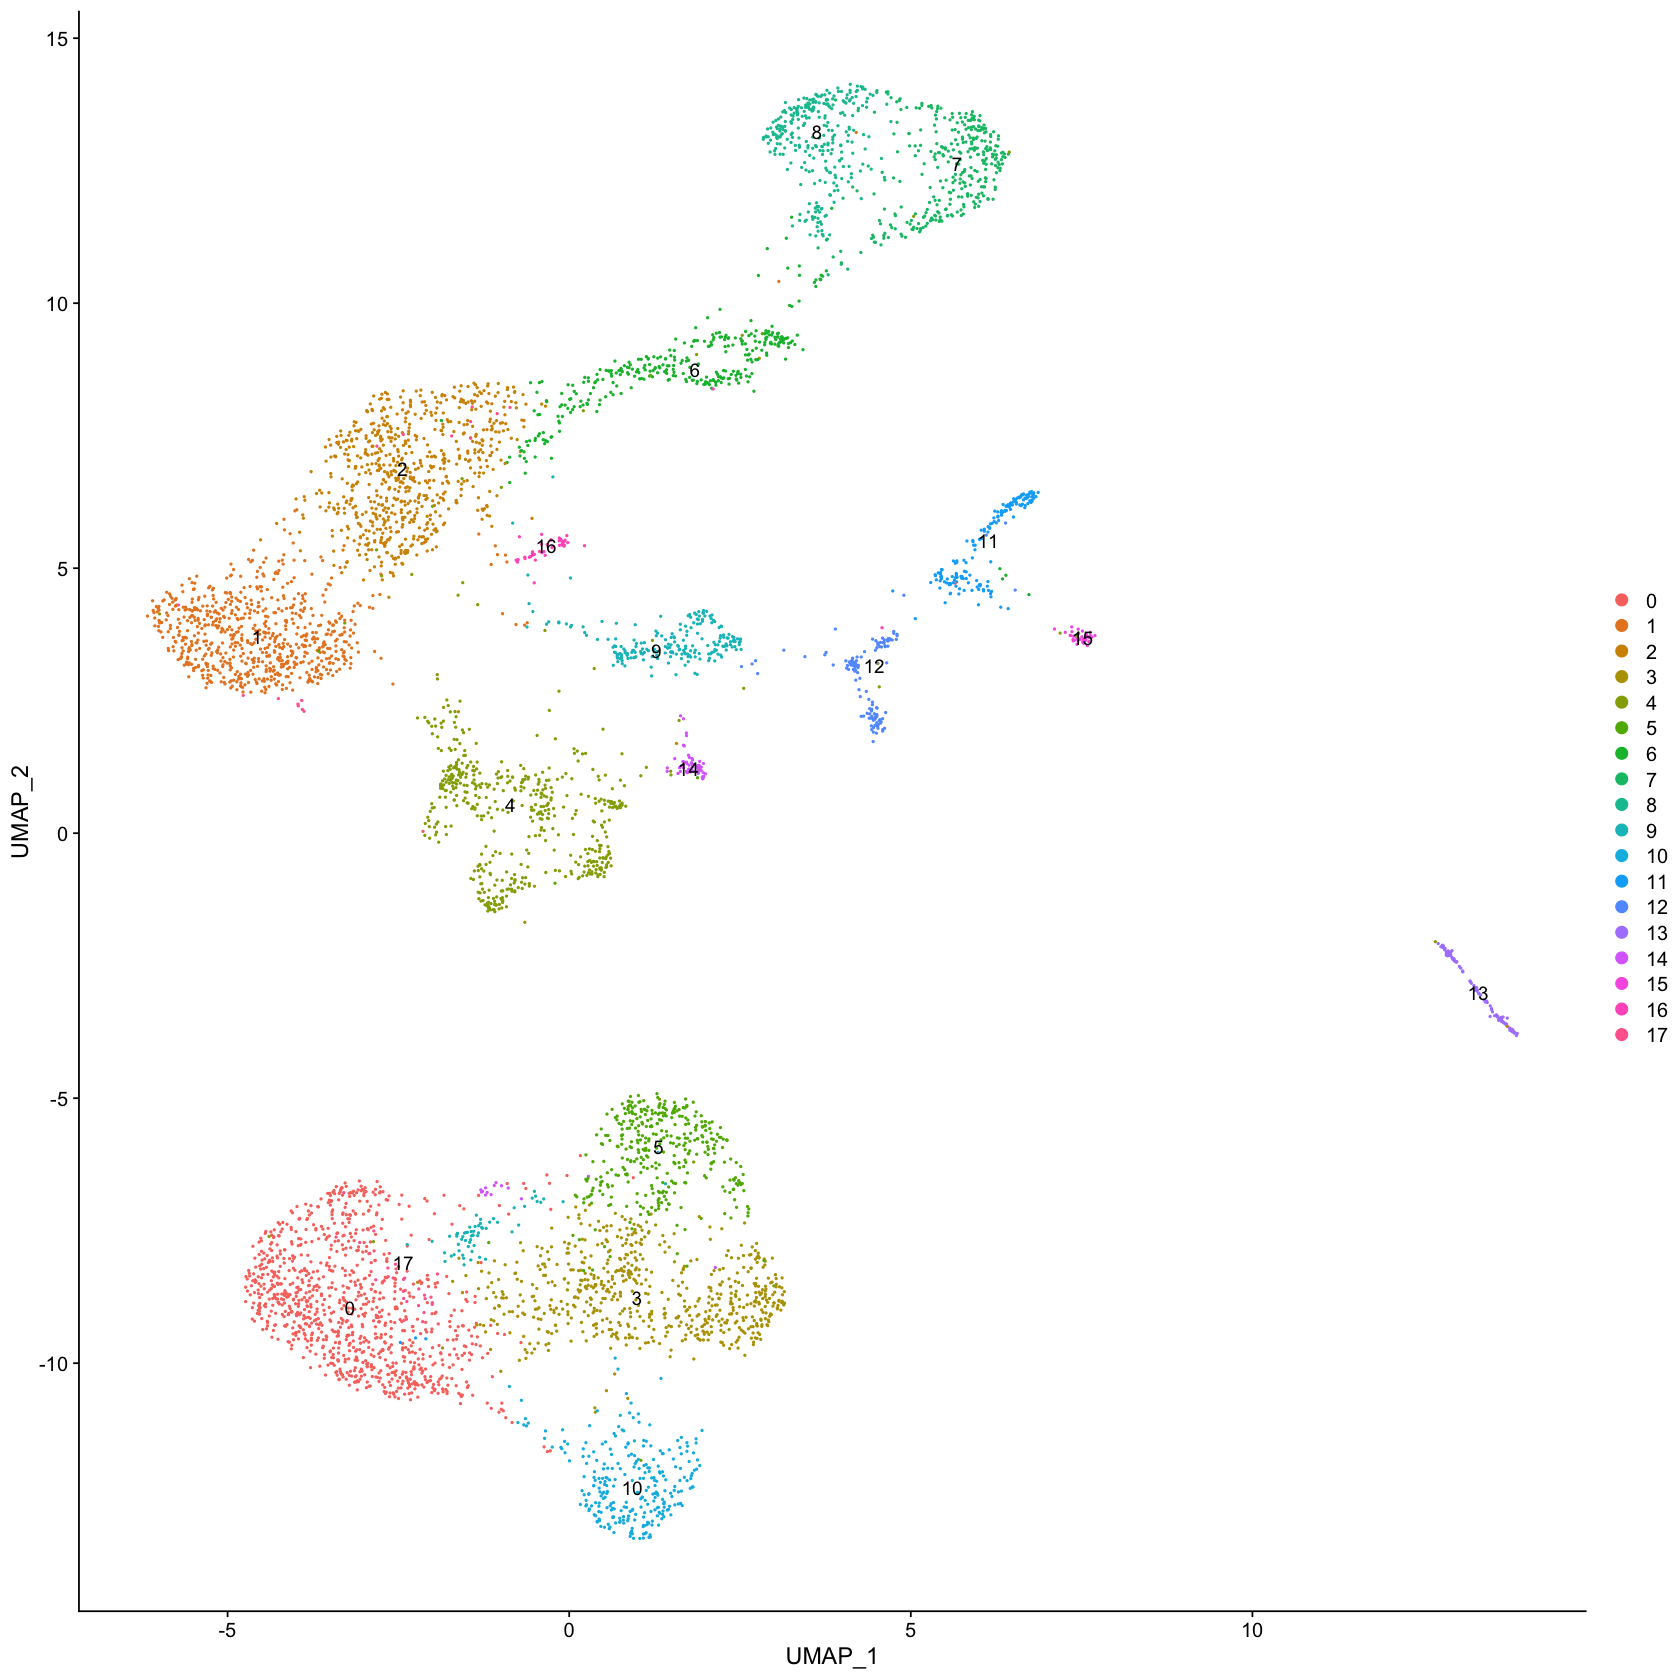

In [12]:
tmp <- FindNeighbors(tmp, dims=1:arg10)
tmp <- FindClusters(tmp, resolution=0.8)

head(Idents(tmp), 5)

tmp <- RunUMAP(tmp, dims=1:arg10)
DimPlot(tmp, reduction="umap", label=TRUE)
png("10-UMAPPlot.png")
DimPlot(tmp, reduction="umap", label=TRUE, height=1440, width=1440, res=216)
dev.off()

### 12. Finding cluster biomarkers

In [13]:
sample.markers <- FindAllMarkers(tmp, min.pct = 0.25, logfc.threshold = 0.25)
sample.markers %>% group_by(cluster) %>% top_n(n = 2, wt = avg_logFC)
markers10 <- sample.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

#write.table(sample.markers, file=paste(arg03,'_all_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)
#write.table(markers10, file=paste(arg03,'_top10_markers.tsv',sep=''), sep='\t', na='', row.names=T, col.names=NA, quote=F)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.6522784,0.966,0.373,0.000000e+00,0,Akr1c21
0.000000e+00,1.6038745,0.999,0.574,0.000000e+00,0,Miox
0.000000e+00,2.5053382,0.985,0.430,0.000000e+00,1,Umod
0.000000e+00,2.4006186,0.880,0.137,0.000000e+00,1,Slc12a1
0.000000e+00,2.5519482,0.854,0.121,0.000000e+00,2,Slc12a3
0.000000e+00,2.2424842,0.503,0.043,0.000000e+00,2,Pvalb
9.663876e-257,1.6085269,0.477,0.055,1.503119e-252,3,Slc13a3
5.582774e-148,1.6522027,0.367,0.061,8.683446e-144,3,Osgin1
0.000000e+00,3.4740678,0.943,0.334,0.000000e+00,4,Cd74


### 13. Saving seurat object to rds

In [14]:
saveRDS(tmp, file="MCA_kidney.rds")

## Conduct codes below after defining cells types

### 1. Importing saved rds file

In [15]:
tmp <- readRDS("MCA_kidney.rds")

### 2. Assigning cell type identity to clusters

In [16]:
new.cluster.ids <- c("Prox tub", "Loop", "Dist tub", "Prox tub", "Macro", "Prox tub", "Princi", "Inter", "Inter", "Endo", "Prox tub", "Epi", "Stromal", "Stromal", "T", "Uroth", "Epi", "Prox tub")
names(new.cluster.ids) <- levels(tmp)
tmp <- RenameIdents(tmp, new.cluster.ids)

### 3. UMAP with new labels

The following functions and any applicable methods accept the dots: CombinePlots



pdf 
  2

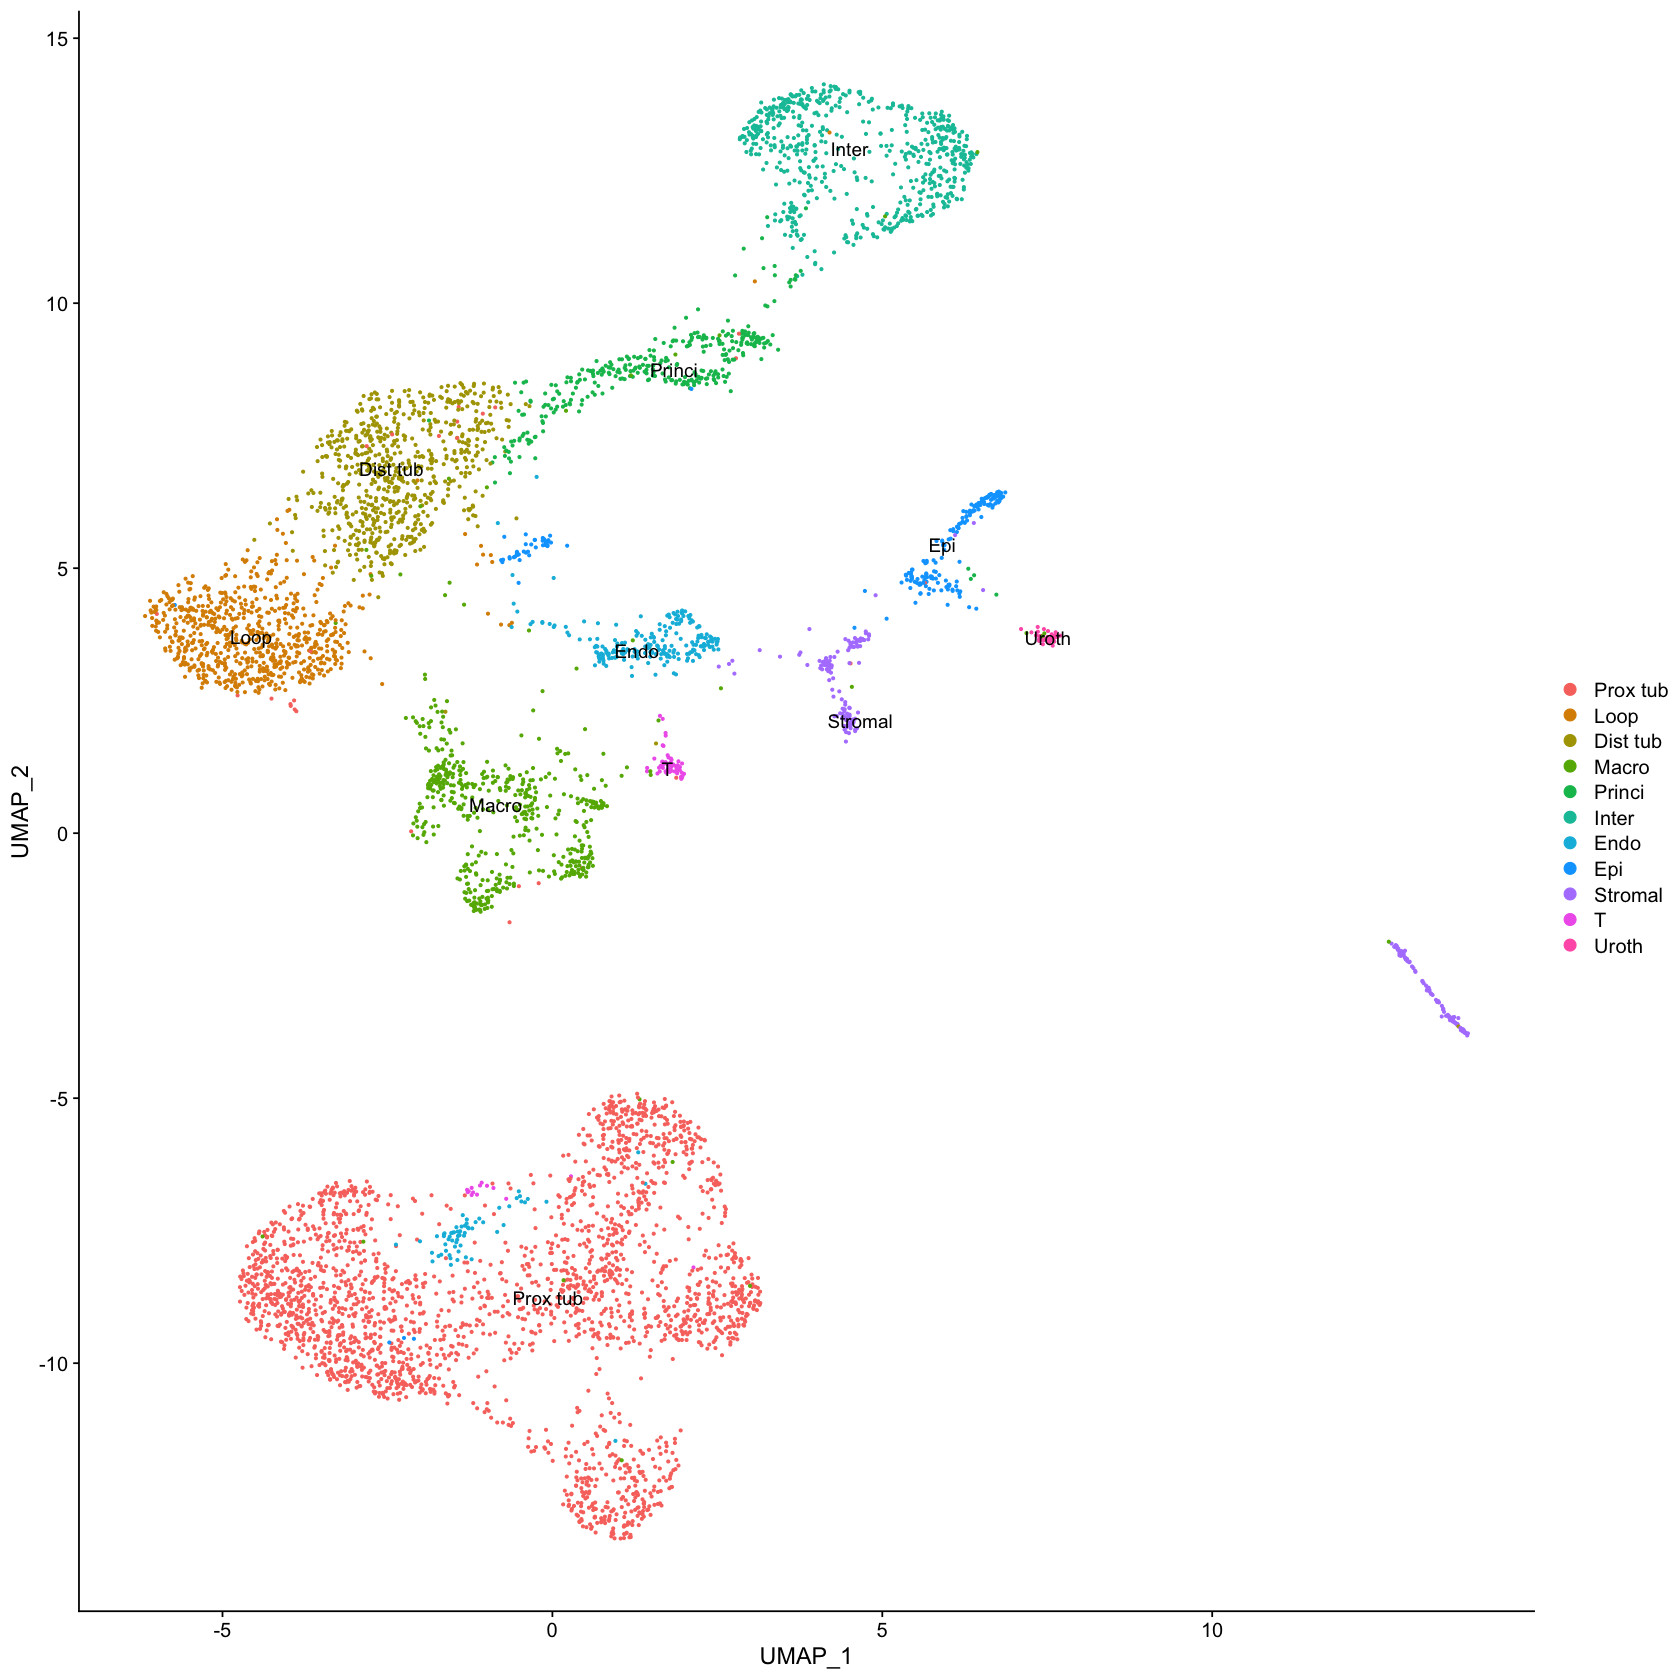

In [17]:
DimPlot(tmp, reduction = "umap", label = TRUE, pt.size = 0.5)
png("11-UMAPPlot_annot.png")
DimPlot(tmp, reduction="umap", label=TRUE, height=1440, width=1440, res=216)
dev.off()

### 4. Exporting count matrix (if you wish to conduct CIBERSORTx)

In [18]:
df_rowname <- as.data.frame(Idents(tmp))
df = as.data.frame(tmp@assays$RNA@counts)
colnames(df) <- df_rowname[,]
write.table(df,file=paste(arg03,'_cell_expression.tsv',sep=''),sep='\t',na='',row.names=T,col.names=NA,quote=F)

### 5. Saving new seurat object

In [19]:
saveRDS(tmp, file="MCA_kidney_label.rds")